displacement: [[ 0.00000000e+00  3.11657273e-06  1.23259282e-05 ... -8.44214666e-04
  -8.13813563e-04 -7.76858453e-04]]
velocity: [[0.         0.00062331 0.00121856 ... 0.00271569 0.00336453 0.00402649]]
acceleration: [[0.060303   0.06435991 0.05468849 ... 0.0659215  0.06384756 0.06854364]]
0.5 0.25
displacement: [[ 0.00000000e+00  3.08277071e-06  1.23727414e-05 ... -8.40827664e-04
  -8.09987586e-04 -7.72654104e-04]]
velocity: [[0.         0.00062332 0.00121856 ... 0.00275805 0.0034065  0.00406802]]
acceleration: [[0.060303   0.06436024 0.05468803 ... 0.06588383 0.06380561 0.06849799]]
0.5 0.25
displacement: [[ 0.          0.          0.         ... -0.23275249 -0.21731881
  -0.201734  ]]
velocity: [[0.         0.         0.         ... 1.53542412 1.55131088 1.56565182]]
acceleration: [[0.         0.         0.         ... 1.66563256 1.51171961 1.35646958]]
0.5 0.25
displacement: [[ 0.          0.          0.         ... -0.23126017 -0.21581753
  -0.20022523]]
velocity: [[0.         0.

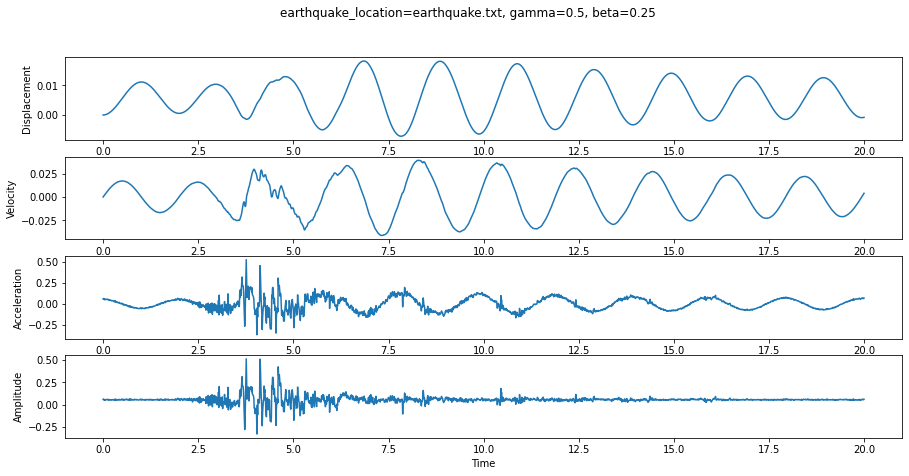

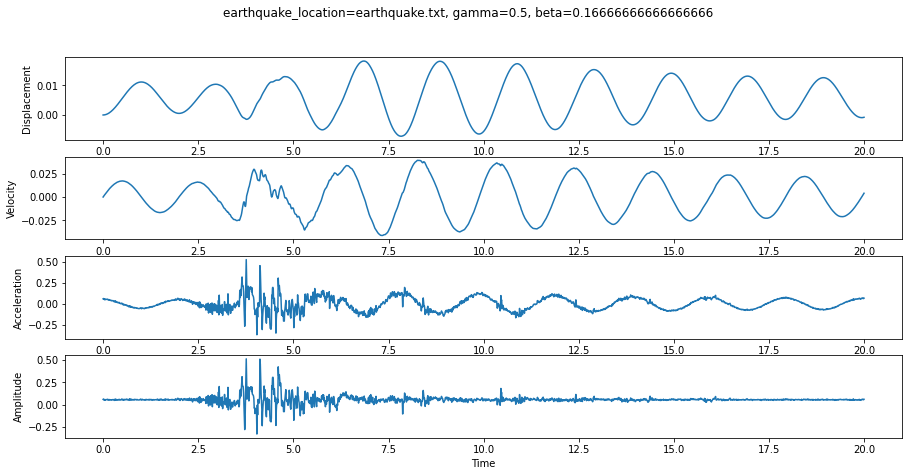

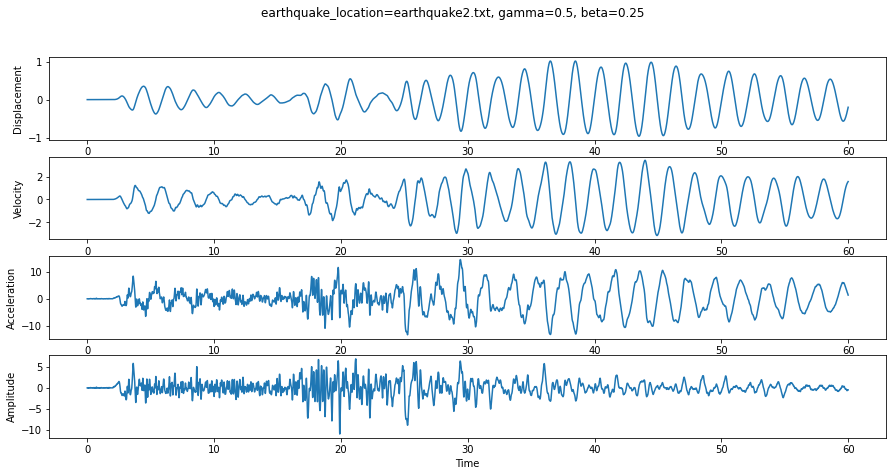

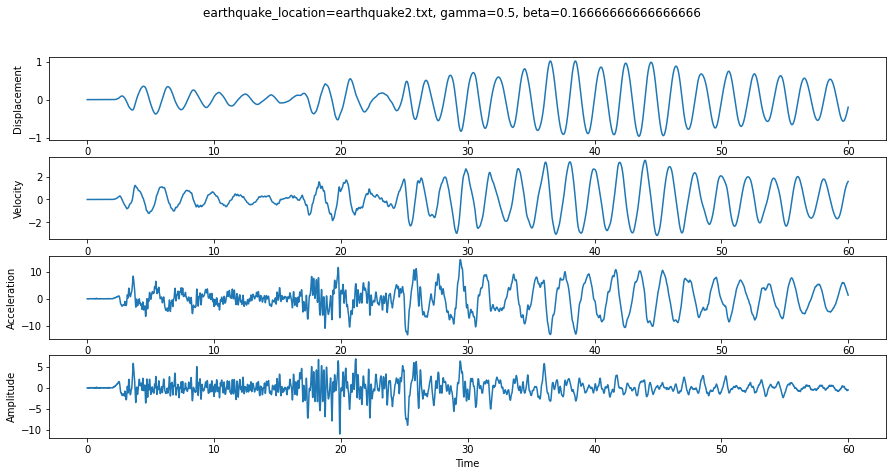

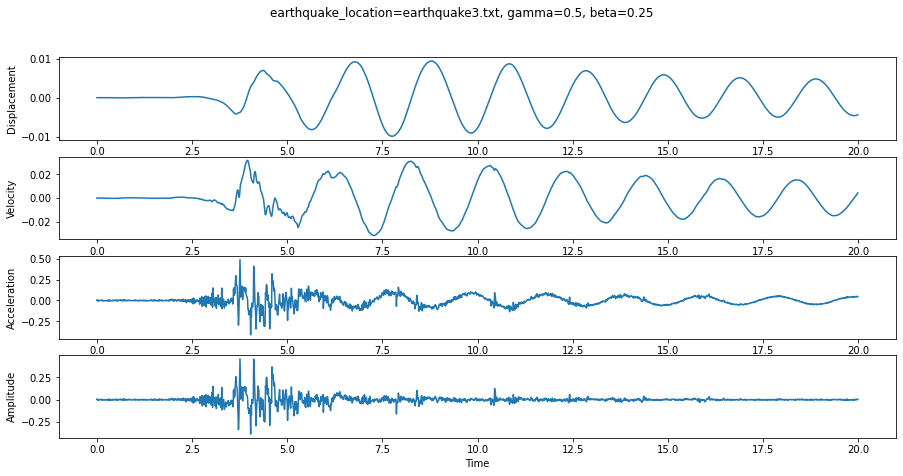

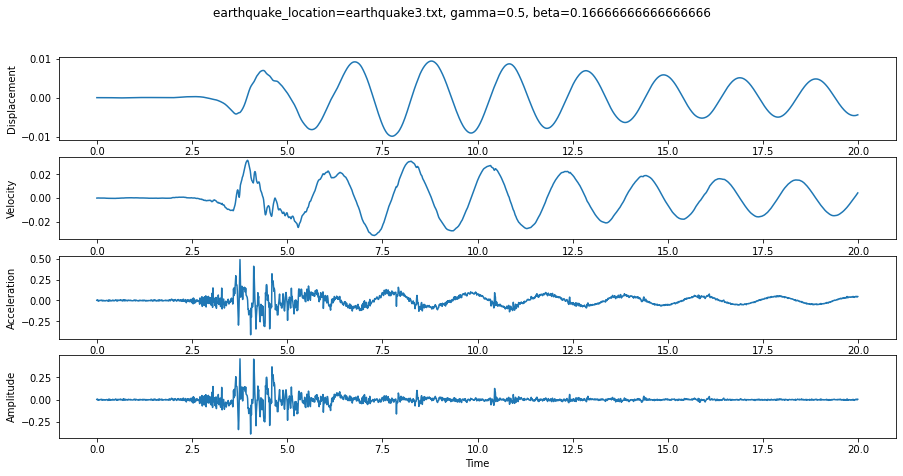

In [2]:
'''
Course name: Computer Programming and Engineering Application [5364] - NYCU 109 Spring
Student: Tran Quoc Kinh (ID : 309612098)
Homework: 4
'''
import math
import numpy as np
import matplotlib.pyplot as plt

def newmark(earthquake_record, acceleration_method):
    global M, K, C, F
    earthquake = open(earthquake_record, "r", encoding='utf-8-sig')
    data = earthquake.read().split('\n')
    F = []
    for data_points in data:
        if data_points >"":
            F.append(float(data_points))
    force = np.zeros((1, len(F)), dtype = float)
    force[0, :] = F # a row vector
    u = np.zeros((1,3), dtype=float)

    # time parameters
    t_start = 0
    dt = 0.01
    t_final =  round ((len(F)-1) * dt, 4)
    t_span = [t_start, t_final]
    '''
    t = np.arange(t_start, t_final + dt, dt)
    CAREFULL: the 'arange' command takes from 0 to -1
    '''
    t = np.linspace(t_start, t_final, len(F))
    n = int((t_final-t_start)/dt + 1e-5) # intervals

    # constant coefficients: mass (M), damping(fiction) (C), forcing terms (K)
    '''
    Depend on the structure, the mass matrix M[n, n], forcing term K[n, n] and damping C[n, n]
    are defined, the are not a single value, but a system expressed by matrices

    Here, I would like to just choose size of M, C, K are one-by-one for simplicity.
    REMEMBER: the row of external force MUST equal the row of M, C, and K

    example:
    M = np.matrix([[10,0,0], [0,20,0], [0,0,30]])
    invM = np.linalg.inv(M)
    K = np.matrix([[45,-20,-15], [-20,45,-25], [-15,-25,40]])
    C = 3*10E-2 * K
    F = .... 3xn vector
    '''
    M = np.matrix(1)
    invM = np.linalg.inv(M)
    K = np.matrix(math.pi * math.pi)
    C = np.matrix(0.1)   
   
    # initial conditions
    tp = np.zeros((len(t)), dtype = float)
    tp[0] = t_span[0]
    x0 = np.matrix(0)
    xd0 = np.matrix(0)
    x = np.zeros((1, len(t)), dtype = float)
    xd = np.zeros((1, len(t)), dtype = float)
    xdd = np.zeros((1, len(t)), dtype = float)
    x[:, 0] = np.transpose(x0)
    xd[:, 0] = np.transpose(xd0)
    
    # Mewmark's constants with couple(gamma, beta) for each earthquake file (location)
    
    gamma = acceleration_method[0]
    beta = acceleration_method[1]

    # coefficients of displacement, velocity and acceleration terms, respectively
    c0 = (1/(beta * dt * dt)) * M + (gamma / (beta * dt)) * C
    c1 = (1/(beta * dt)) * M + (gamma/beta-1) * C
    c2 = (1/(2*beta)-1) * M + dt * (gamma/(2 * beta)-1) * C

    # compute constant matrix Keff and initial acceleration (xdd = x doubled dot)
    '''
    in the expression:  x[n+1] = invert(Keff) * Peff[n]
    x[n+1] is the displacement at the time t, n = 0, 1, 2, 3..........  
    Expression: Peff[n] is the linear combination of x[n], xd[n] and xdd[n]

    where:   
    x is displacement;  xd is derivative of displacement OR velocity; and
    xdd is second derivative of displacement OR acceleration
    '''
    Keff = (1/(beta * dt**2)) * M + (gamma/(beta * dt)) * C + K
    inv_Keff = np.linalg.inv(Keff)
    xdd[:, 0] = np.matmul(invM, (force[:, 0] - C * xd[:, 0] - K * x[:, 0]))

    # outputs: displacement, velocity and acceleration
    for i in range(n):
        Peff = force[:,i+1] + c0 * x[:,i] + c1 * xd[:,i] +  c2 * xdd[:,i]
        x[:, i+1] = np.matmul(inv_Keff, Peff)                                                                 #displacement       
        xdd[:, i+1] = (x[:, i+1]-x[:, i])/(beta * (dt**2)) - \
                      (1/(beta * dt)) * xd[:, i] - (1/(2*beta)-1) * xdd[:, i]                               #velocity
        xd[:, i+1] = xd[:, i] + (1-gamma) * dt * xdd[:, i] + gamma * dt * xdd[:, i+1] #acceleration
        tp[i+1] = tp[i] + dt                                                                                               #time increments 

    # check the output vectors and ploting figures 
    print('displacement: {}'.format(x))
    print('velocity: {}'.format(xd))
    print('acceleration: {}'.format(xdd))
    fig, axes = plt.subplots(4,1, figsize = (15, 7) )
    axes[0].plot(tp, x[0,:])
    axes[0].set_ylabel('Displacement')
    axes[1].plot(tp, xd[0,:])
    axes[1].set_ylabel('Velocity')
    axes[2].plot(tp, xdd[0,:])
    axes[2].set_ylabel('Acceleration')
    axes[3].plot(tp, force[0,:])
    axes[3].set_ylabel('Amplitude')
    axes[3].set_xlabel('Time')
    fig.suptitle('earthquake_location={}, gamma={}, beta={} '.format(earthquake_record, \
                                                                     gamma, beta))

# data from earthquake records and Newmark's constants
earthquake_record = ['earthquake.txt', 'earthquake2.txt', 'earthquake3.txt']
'''
Newmark chose gamma = 1/2 
Averange acceleration: beta = 1/4 ----- unconditional stable (always convergent)
Linear aceeleration: beta = 1/6 ---- only conditional stable
'''
average_acceleration = [1/2, 1/4]
linear_acceleration = [1/2, 1/6]
acceleration_method = [average_acceleration, linear_acceleration]
for i in range(len(earthquake_record)):
    for j in range(len(acceleration_method)):
        newmark(earthquake_record[i], acceleration_method[j])
        print (acceleration_method[0][0], acceleration_method[0][1])
plt.show()
